# QBIO 401 Homework 4
## Hirad Hosseini, Fall 2023

For this assignment we are going to analyze the file “multiz30-ace2.txt”. We discussed the
format of this file in the “UCSC Genome Browser and Regular Expressions” lecture, and I have
placed a copy of this file on Blackboard.

Write a Python function (or functions) that calculates the number of nucleotide sites for which
k species in the multiple alignment agree with human. Do this for k = 0, 1, 2, … 29 (there are a
total of 30 species in the multiple alignment including human). Consider the short example
below:

human = "ACGTTAC"

chimp = "ACGTTAT"

mouse = "ACGTTTT"

fish = "AC-----"

For this example, the correct answer is: [1,1,3,2].

In [1]:
import re

In [2]:
def k_nuc_match(file_name):
    species_counter = 0
    k_counts = [0]*30 #contains final k values to be returned
    f_in = open(file_name)
    for line in f_in:
        if re.match("a ", line): #checks for new alignment fragment. If found, resets species_counter and sequence 
            #list, then reading in the human sequence to be compared.  
            species_counter = 0
            species_seq_list = []
            human_seq = f_in.readline()
            human_seq = re.split("\s+", human_seq) #separates line into segments based on whitespace
            human_seq = human_seq[6] #sixth segment of line always corresponds to the actual human sequence
        if re.match("s ", line): #checks for aligned sequence for each species. If found, appends to species_seq_list
            #for future comparison with human sequence. 
            species_seq = line
            species_seq = re.split("\s+", species_seq) #separates line into segments based on whitespce
            species_seq = species_seq[6] #sixth segment of line always corresponds to the actual species sequence
            species_seq_list.append(species_seq) #contains all species sequences
            temp = f_in.readline() #reads in "i" lines as junk
        species_counter += 1
        
        if species_counter == 30: #there are 30 lines per aligned fragment corresponding to 30 total species
            for i in range(len(human_seq)): #comparing human seq to species sequences at each nucleotide 
                k_counter = 0 #tracks number of species which match at given nucleotide
                for j in range(len(species_seq_list)): #iterates through all species in list
                    if species_seq_list[j][i] == human_seq[i]: #if match, increments counter
                         k_counter += 1
                k_counts[k_counter] += 1 #after comparison, increments the final k value list           
    f_in.close()
    return k_counts

In [3]:
k_counts = k_nuc_match("fixed-multiz30-ace2.txt")
print(k_counts)

[246, 93, 131, 301, 506, 1477, 492, 568, 506, 288, 386, 419, 476, 488, 532, 798, 1934, 1004, 1143, 2038, 3898, 2113, 2805, 3140, 3248, 4710, 6469, 7857, 7959, 3451]


In [4]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of nucleotide sites for which k species in multiple alignment agree with human')

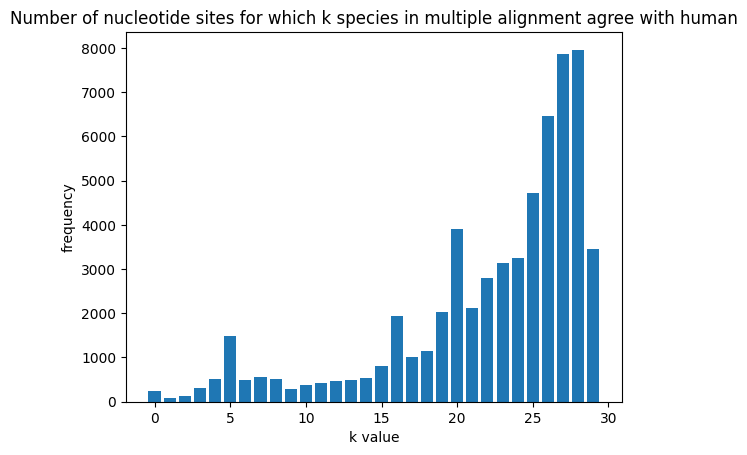

In [5]:
k_values = list(range(30)) #list of k values from 0 to 29
plt.bar(k_values, k_counts)
plt.xlabel("k value")
plt.ylabel("frequency")
plt.title("Number of nucleotide sites for which k species in multiple alignment agree with human")